In [1]:
# importing the relevant modules
import gym
import numpy as np
import matplotlib.pyplot as plt
import math 
import random
import time
from IPython.display import clear_output

In [2]:
# Initialzing and setting up the environment
env = gym.make('CartPole-v0')

Results after 100 episodes:
Average timesteps per episode: 22.85


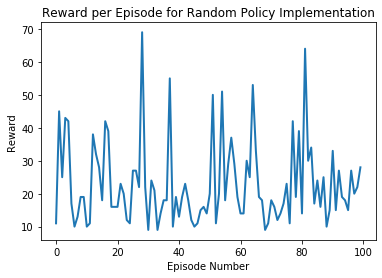

In [4]:
# Random Policy Implementation
no_epochs = 0
no_episodes = 100
random_reward_list = []
episode_reward = 0

# Iterating through 100 episodes(each episode represents a cartpole scenario)
for _ in range(no_episodes):
    state = env.reset()
    epochs, reward = 0, 0
    
    # bool -> True, if poles falls from cart
    done = False
    
    while not done:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        episode_reward += reward

        epochs += 1
    no_epochs += epochs
    random_reward_list.append(episode_reward)
    episode_reward = 0
    
avg_time_random = no_epochs / no_episodes
print(f"Results after {no_episodes} episodes:")
print(f"Average timesteps per episode: {avg_time_random}")

# Visualizing the results
plt.plot(random_reward_list , linewidth=2)
plt.ylabel('reward')
plt.xlabel('iteration number')
plt.title("Reward per Episode for Random Policy Implementation")
plt.show()

In [9]:
# Q-Learning Implementation

# Q-Training
# create buckets with upper and lower limits
num_buckets = 4

# setting cart position, cart velocity, pole angle, tip pole velocity
buckets = [np.linspace(-2.4, 2.4, num_buckets + 1)[1:-1],np.linspace(-3.0, 3.0, num_buckets + 1)[1:-1],
np.linspace(-0.5, 0.5, num_buckets + 1)[1:-1],np.linspace(-2.0, 2.0, num_buckets + 1)[1:-1]]


# create Q table 
num_actions = 2
max_buckets = max(len(buckets) for bucket in buckets)
num_states = (max_buckets + 1) ** len(buckets)
q_table = np.zeros(shape=(num_states, num_actions))

# Function to discretize 4 variables for state
def discretize_state(observation):
    state = sum(np.digitize(x=feature, bins=buckets[i]) * ((max_buckets + 1) ** i)
        for i, feature in enumerate(observation))
    return state

In [10]:
%time

# Hyperparameters
alpha = 0.2
gamma = 0.5
epsilon = 0.1

# For plotting metrics
all_epochs = []
episode_reward = 0
Q_reward_list = []

# training over 10,000 episodes
for i in range(1, 10001):
    state = discretize_state(env.reset())
    epochs, reward = 0, 0
    
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values
            
        # action
        next_state, reward, done, info = env.step(action) 
        next_state = discretize_state(next_state)
        #calculate total reward
        episode_reward+=reward
        
        # get previous Q value
        old_value = q_table[state, action]
        #obtain the maximum reward for next state
        next_max = np.max(q_table[next_state])
        #obtain new q value after action was taken
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        #update q_table with new q value
        q_table[state, action] = new_value
        
        # update state current -> new
        state = next_state
        epochs += 1
        
    Q_reward_list.append(episode_reward)
    episode_reward = 0
    
    #live update on current episode    
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 10000
Training finished.



Results after 100 episodes:
Average timesteps per episode: 12.81


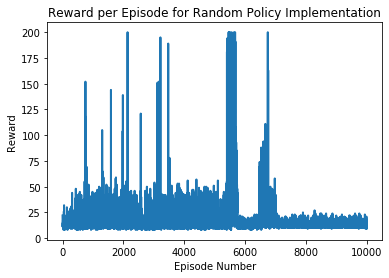

In [11]:
# Q -Learning Implementation
no_epochs = 0
no_episodes = 100

for _ in range(no_episodes):
    state = env.reset()
    state = discretize_state(state)
    epochs, reward= 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        state = discretize_state(state)
        
        epochs+=1
    no_epochs+=epochs
    
Q_avg_time = no_epochs / no_episodes
print(f"Results after {no_episodes} episodes:")
print(f"Average timesteps per episode: {Q_avg_time}")

# Visualizing the results
plt.plot(Q_reward_list , linewidth=2)
plt.ylabel('reward')
plt.xlabel('iteration number')
plt.title("Reward per Episode for Random Policy Implementation")
plt.show()